In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [3]:
data = data.fillna(data.Albumin_and_Globulin_Ratio.mean())

In [4]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
x = data.drop(columns = ('Dataset'))
x = x.replace('Male', 0)
x = x.replace('Female',1)

y = data.Dataset

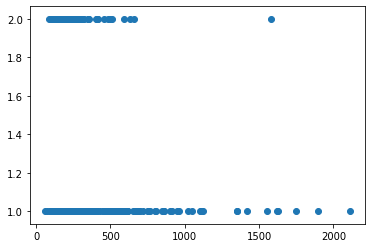

In [14]:
plt.scatter(x.Alkaline_Phosphotase, y)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [17]:
scaled

array([[ 1.25209764,  1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704, -0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704, -0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504, -0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917, -0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777, -0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [18]:
scaled_data = pd.DataFrame(scaled , columns = x.columns)
scaled_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144


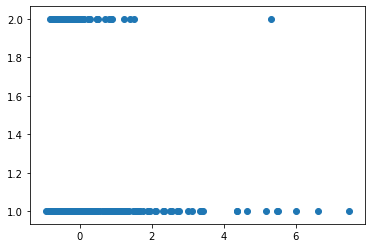

In [19]:
plt.scatter(scaled_data.Alkaline_Phosphotase, y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data , y , test_size = 0.2 , random_state=30)

print('Shape(X_train) : ' , x_train.shape)
print('Shape(y_train) : ' , y_train.shape)
print('Shape(X_test) : ' , x_test .shape)
print('Shape(y_test) : ' , y_test.shape)

Shape(X_train) :  (466, 10)
Shape(y_train) :  (466,)
Shape(X_test) :  (117, 10)
Shape(y_test) :  (117,)


In [11]:
x_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
384,-0.664329,-0.567446,0.064666,0.218772,0.821588,0.187908,-0.065510,0.015500,-0.430092,-0.776397
551,-0.973430,-0.567446,-0.338287,-0.387054,-0.537950,-0.332743,-0.304537,-0.261120,-0.178468,-0.147898
183,-0.293407,-0.567446,-0.434996,-0.493964,-0.492632,-0.332743,-0.321857,-0.998774,-0.807528,-0.462147
126,0.201154,-0.567446,0.403147,0.361319,2.106969,0.286558,-0.075902,-0.445534,-0.430092,-0.462147
133,0.510255,-0.567446,-0.386642,-0.387054,-0.216605,-0.349185,-0.332250,0.107706,-0.304280,-0.462147
...,...,...,...,...,...,...,...,...,...,...
430,0.510255,1.762281,-0.418878,-0.493964,-0.447314,-0.332743,-0.266431,-1.552014,-1.562400,-1.090646
145,1.252098,-0.567446,-0.402760,-0.458327,-0.369038,-0.343704,-0.304537,-0.998774,-0.304280,0.480601
140,0.942997,-0.567446,-0.434996,-0.493964,-0.430835,-0.332743,-0.308001,-0.261120,0.198969,0.480601
500,1.561199,-0.567446,-0.096515,-0.101959,0.306611,-0.102560,-0.190220,-0.445534,-0.933340,-1.090646


In [12]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(x_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [13]:
pred_test = model.predict(x_test)
print(pred_test)

pred_train = model.predict(x_train)
print(pred_train)

[1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

In [14]:
accuracy_train = accuracy_score(y_train , pred_train)
print("TRAIN ACCURACY : ", accuracy_train*100,"%")

accuracy_test = accuracy_score(y_test , pred_test)
print("TEST ACCURACY : ", accuracy_test*100,"%")

TRAIN ACCURACY :  72.74678111587983 %
TEST ACCURACY :  73.50427350427351 %
